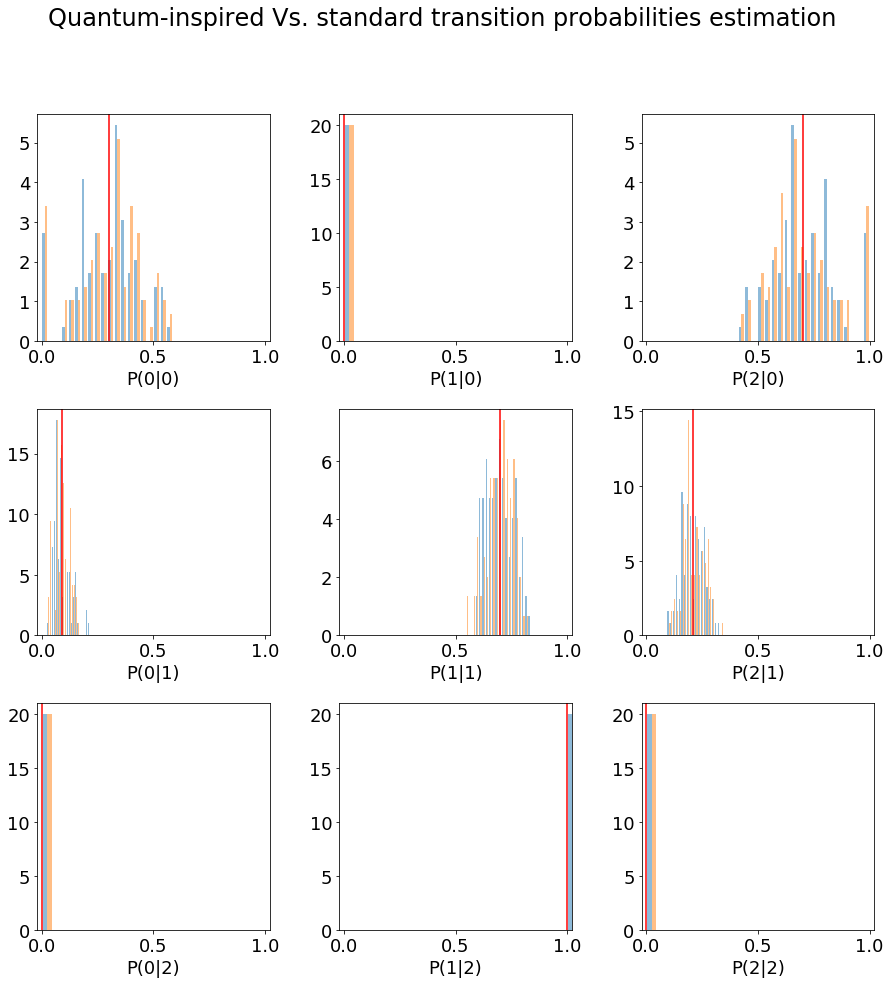

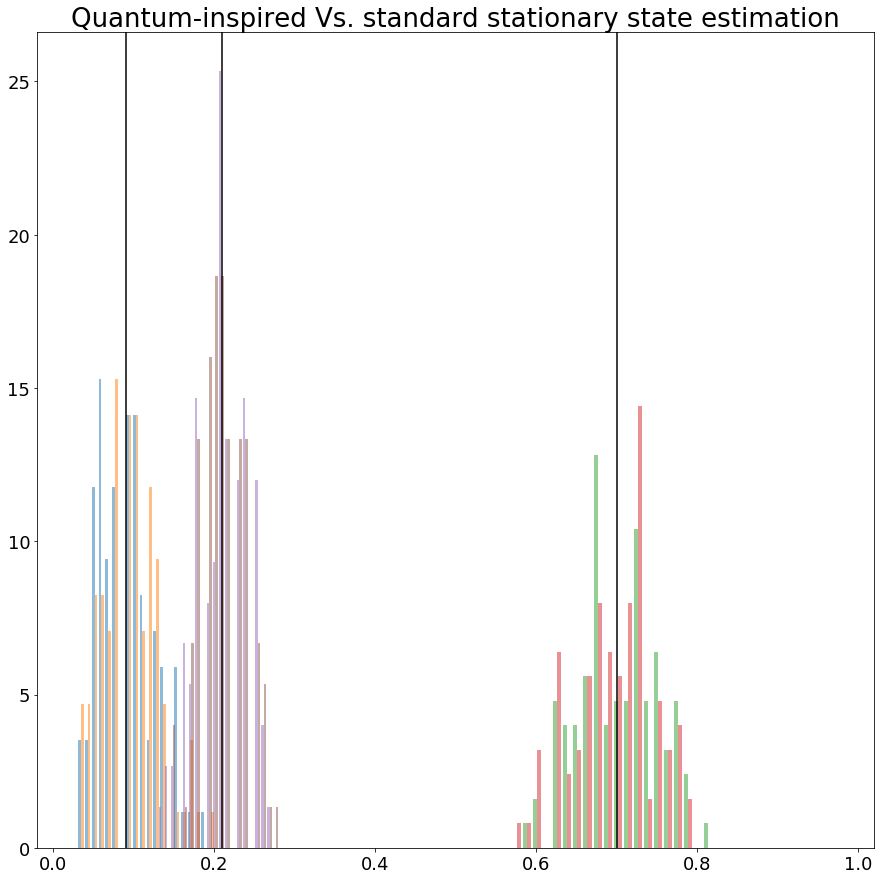

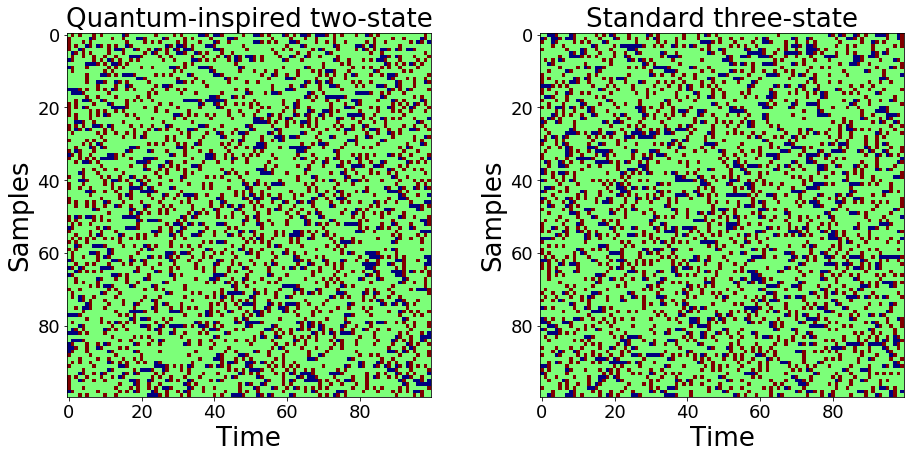

In [1]:
# Jupyter notebook implementing the post-ptocessed 
# perturbed coin process example introduced in 
# Sec. III B 2 of Realpe-Gómez, J & Killoran, N.:
# "Quantum-inspired memory-enhanced stochastic algorithms"
# arXiv preprint, 2019.
# This example was implemented experimentally with quantum
# technologies by Ghafari et al. (see arXiv:1812.04251)

import numpy as np
import random as rm
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Length of trajectory of sequentially generated samples
nsteps   = 100
# Number of trajectories 
nsamples = 100

# Parameters defining transition probabilities (see Fig. 1b)
p = 0.7
q = 0.3

sample_pstat  = [[],[],[]]
sample_series = []
sample_freqs  = [[[],[],[]],[[],[],[]],[[],[],[]]]

for k in range(nsamples):
# Random initial state, not stationary
    x0 = np.random.choice(3)
    sA = 1  # |1>_A
    if(x0 == 0):
        sA = 0  # |0>_A
    elif(x0 == 1):
        sA = np.random.choice(2,p=[q,1-q]) # q |0>_A + (1-q) |1>_A
     
    # Run quantum-inspired two-level stochastic process
    series = []
    for i in range(nsteps):
        if(sA == 0):
            s = np.random.choice(2,p=[1-p,p]) # Prepare (1-p)|00>_BC + p |11>_BC
            sB = s
            sC = s
            x = sA + 2*sC  # Output
            sA = sB        # Move B into A
            series.append(x)
        else:
            sB = np.random.choice(2,p=[q,1-q]) # Prepare q |0>_B + (1-q) |1>_B
            sC = 0
            x = sA + 2*sC  # Output
            sA = sB        # Move B into A
            series.append(x)
    sample_series.append(series)
    
    # Estimate stationary distribution from data
    pstat = np.histogram(series,bins=range(4),density=True)[0]
    for i in range(len(pstat)):
        sample_pstat[i].append(pstat[i])

    # Estimate transition probabilites from data
    count = np.array([0,0,0])
    freqs = np.array([[0,0,0],[0,0,0],[0,0,0]])
    for i in range(len(series)-1):
        freqs[series[i]][series[i+1]] += 1
        count[series[i]] += 1

    for i in range(3):
        for j in range(3):
            sample_freqs[i][j].append(freqs[i][j] / count[i] )

# Given stationary distribution & transition probabilities (see Fig. 1b)
pstat_true = np.array([q*(1-p),p,p*q])/(p+q)
trans = np.array([[1-p,0,p],[q*(1-p),1-q,p*q],[0,1,0]])

# Standard simulation of given three-level stochastic process
sample_xpstat  = [[],[],[]]
sample_xseries = []
sample_xfreqs  = [[[],[],[]],[[],[],[]],[[],[],[]]]
for k in range(nsamples):
# Random initial state, not stationary
    xseries = []
    x = np.random.choice(3)
    for i in range(nsteps):
        x = np.random.choice(3, p=trans[x])
        xseries.append(x)
    sample_xseries.append(xseries)    

    # Estimate stationary distribution from data
    xpstat = np.histogram(xseries,bins=range(4),density=True)[0]
    for i in range(len(xpstat)):
        sample_xpstat[i].append(xpstat[i])

    # Estimate transition probabilites from data
    count = np.array([0,0,0])
    freqs = np.array([[0,0,0],[0,0,0],[0,0,0]])
    for i in range(len(xseries)-1):
        freqs[xseries[i]][xseries[i+1]] += 1
        count[xseries[i]] += 1

    for i in range(3):
        for j in range(3):
            sample_xfreqs[i][j].append(freqs[i][j] / count[i] )

    
# Plot estimated transition probabilities
figh, axh= plt.subplots(3,3,figsize=(15,15))
figh.subplots_adjust(hspace=0.3,wspace=0.3)
figh.suptitle('Quantum-inspired Vs. standard transition probabilities estimation', fontsize=24)
for i in range(3):
    for j in range(3):
        axh[i,j].hist([sample_freqs[i][j],sample_xfreqs[i][j]],bins = 20,density=True,alpha=0.5)
        axh[i,j].axvline(trans[i][j],color='r')
        axh[i,j].set_xlabel('P('+str(j)+'|'+str(i)+')',fontsize=18)
        axh[i,j].set_xlim(-0.02,1.02)
        axh[i,j].tick_params(labelsize=18)
        
plt.tick_params(labelsize=18)
figh

# Plot estimated stationary distribution
figp, axp = plt.subplots(figsize=(15,15))
axp.set_xlim(-0.02,1.02)
axp.set_title('Quantum-inspired Vs. standard stationary state estimation', fontsize=26)
#plt.legend(loc='upper right')
for i in range(3):
    axp.hist([sample_pstat[i],sample_xpstat[i]],bins=20,density=True,alpha=0.5,label='quantum-inspired pi_'+str(i))
    axp.axvline(pstat_true[i],color='k')

axp.tick_params(labelsize=18)
figp
    
# Plot samples 
figs, axs = plt.subplots(1,2,figsize=(15,15))
figs.subplots_adjust(wspace=0.3)
for j in range(2):
    if(j==0):
        i = axs[j].imshow(sample_series,cmap=cm.jet)
    else:
        i = axs[j].imshow(sample_xseries,cmap=cm.jet)
    axs[j].set_xlabel('Time', fontsize=26)
    axs[j].set_ylabel('Samples', fontsize=26)
    if(j==0):
        axs[j].set_title('Quantum-inspired two-state', fontsize=26)
    else:
        axs[j].set_title('Standard three-state', fontsize=26)
    axs[j].tick_params(labelsize=18)
#figs.colorbar(i)

plt.show()